In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random
import joblib

In [2]:
random.seed(19980501)
plasma=pd.read_csv('plasmacell1.csv')
print(plasma['celltype'].shape)
plasma.index=[plasma['Unnamed: 0']]
plasma=plasma.drop('Unnamed: 0',axis=1)
print(plasma)
plasma['celltype'].unique()

testset=random.sample(range(1,59678),12000,)
testset= plasma.iloc[testset,]
test_celltype=testset.celltype
testset = testset.drop('celltype',axis=1)

(59678,)
                           VPREB3     RGS13    S100A6      EMP3  TNFRSF13B  \
Unnamed: 0                                                                   
HD1_TN_AAACCCAAGAGTTGCG  2.193819  1.754687  0.000000  0.953155   0.000000   
HD1_TN_AAACCCAAGCCTGCCA  1.366577  0.606951  0.000000  0.000000   0.348834   
HD1_TN_AAACCCAAGGAGCTGT  0.000000  0.000000  0.000000  0.000000   0.000000   
HD1_TN_AAACCCAAGTATTCCG  0.000000  0.773783  0.773783  0.000000   0.000000   
HD1_TN_AAACCCAAGTGGATAT  1.600064  1.935864  0.000000  0.000000   0.000000   
...                           ...       ...       ...       ...        ...   
HD9_BM_TTTGTTGTCCTATTTG  0.000000  0.000000  1.266380  0.614823   1.657589   
HD9_BM_TTTGTTGTCCTTATGT  0.000000  0.000000  2.382285  1.453144   0.000000   
HD9_BM_TTTGTTGTCGAGAACG  0.000000  0.000000  1.048450  1.048450   0.000000   
HD9_BM_TTTGTTGTCTCACTCG  0.000000  0.000000  0.957807  0.000000   0.790492   
HD9_BM_TTTGTTGTCTTGTGCC  0.000000  0.000000  3.593586  

In [3]:
classifier=joblib.load('automl_Normalized.jl')

ModuleNotFoundError: No module named 'autosklearn'

In [6]:
test_pre=classifier.decision_function(testset)

test_pre[1,]

test_pre.index

test_pre=pd.DataFrame(test_pre)
test_pre.to_csv('test_value.csv')

test=pd.read_csv('test.csv')
test.index=test['Unnamed: 0']

In [4]:
test['0']

Unnamed: 0
HD1_TN_CACGTTCAGCGAATGC    tonsil_highCD74_plasmacell
HD2_TN_TAATCTCGTCCACGCA          blood_end_plasmacell
HD8_BM_TGCTGCTCAACACCTA    blood_highCXCR4_plasmacell
HD1_TN_AGGGTCCCAAACCATC    tonsil_highCD74_plasmacell
HD2_TN_AGGATAACACGTAACT    tonsil_highCD74_plasmacell
                                      ...            
HD4_PB_CTCCGATAGGTTACCT     blood_lowCXCR4_plasmacell
HD1_TN_ATGCATGCACGCGCTA    tonsil_highCD74_plasmacell
HD7_BM_AACTCCCTCGTGACAT    blood_highCXCR4_plasmacell
HD1_TN_TGTGGCGAGGCCTGAA     tonsil_lowCD74_plasmacell
HD3_TN_ATCCACCCAATCTCTT    tonsil_highCD74_plasmacell
Name: 0, Length: 12000, dtype: object

In [5]:
test_celltype

Unnamed: 0             
HD1_TN_CACGTTCAGCGAATGC    tonsil_highCD74_plasmacell
HD2_TN_TAATCTCGTCCACGCA     tonsil_lowCD74_plasmacell
HD8_BM_TGCTGCTCAACACCTA    blood_highCXCR4_plasmacell
HD1_TN_AGGGTCCCAAACCATC    tonsil_highCD74_plasmacell
HD2_TN_AGGATAACACGTAACT    tonsil_highCD74_plasmacell
                                      ...            
HD4_PB_CTCCGATAGGTTACCT      blood_cycling_plasmacell
HD1_TN_ATGCATGCACGCGCTA    tonsil_highCD74_plasmacell
HD7_BM_AACTCCCTCGTGACAT    blood_highCXCR4_plasmacell
HD1_TN_TGTGGCGAGGCCTGAA     tonsil_lowCD74_plasmacell
HD3_TN_ATCCACCCAATCTCTT    tonsil_highCD74_plasmacell
Name: celltype, Length: 12000, dtype: object

In [6]:
confMatrix = confusion_matrix(test_celltype, test['0'])

In [7]:
 import matplotlib.pyplot as plt 

In [8]:
import itertools

In [9]:
confMatrix

array([[ 282,    0,    1,   39,    0,    0,    0,    0],
       [   0,  394,   12,    0,    0,    0,   21,    5],
       [   1,   38, 2160,  127,    8,    0,  104,   43],
       [  13,   11,  113, 1162,    1,    0,   46,    3],
       [   1,    3,   22,    9,  175,    0,   20,    1],
       [   2,    0,    0,    3,    0,   13,   18,    7],
       [   0,   32,    3,   14,    0,    0, 5375,   97],
       [   0,   81,   17,    5,    0,    0,  459, 1059]])

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    混淆矩阵的可视化: 传入混淆矩阵和类别名（或数字代替）
    :param cm: 混淆矩阵
    :param classes: 类别
    :param normalize:
    :param title:
    :param cmap:
    :return:
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,ha='right')
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('./confMatrix.jpg')
    plt.show()

Normalized confusion matrix


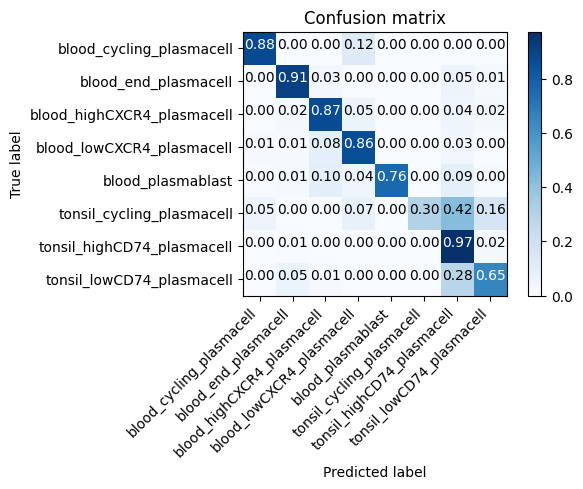

In [11]:
plot_confusion_matrix(cm=confMatrix,normalize=True,classes=['blood_cycling_plasmacell','blood_end_plasmacell',
                'blood_highCXCR4_plasmacell','blood_lowCXCR4_plasmacell',
                'blood_plasmablast','tonsil_cycling_plasmacell','tonsil_highCD74_plasmacell',
                'tonsil_lowCD74_plasmacell'])